<a href="https://colab.research.google.com/github/SagarDhandare/Churn-Modelling-Project/blob/main/Churn_modelling_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Modelling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### What is Churn Rate?
The churn rate is the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate.

### Problem Statement
The Company wants a model which can predict that how likely its current customers will leave the company in near future and hence calculate its churn rate.

This is a Classification Problem in which you'll classify a customer based on his/her Credit Score, Region, Gender, Age, Tenure, Balance, Salary etc. whether he/she will EXIT(1) or NOT(0).

### About the Dataset:
The dataset is well-labeled to explain all its columns.
The Target Variable is EXITED(0/1) which you have to predict.

In [4]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading Dataset:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

# top 5 records:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# listing down unnecessary features:
Unnecessarry_Cols = ['RowNumber','CustomerId','Surname']

In [7]:
# removing unnecassary features:
df = df.drop(Unnecessarry_Cols, axis=1)

In [8]:
# top 5 records after removing unnecessary feature:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# cheacking NaN values present or not:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- As we see, there is no NaN values (Missing Values) present in our dataset.

In [10]:
# dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
# dataset description:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Total number of exited people     : 2037
Total number of not exited people : 7963


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


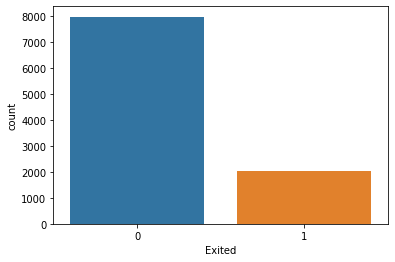

In [12]:
# target feature:
print('Total number of exited people     :', df['Exited'].value_counts()[1])
print('Total number of not exited people :', df['Exited'].value_counts()[0])

# Visualization:
sns.countplot(df['Exited'])
plt.show()

France  : 5014
Germany : 2509
Spain   : 2477


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


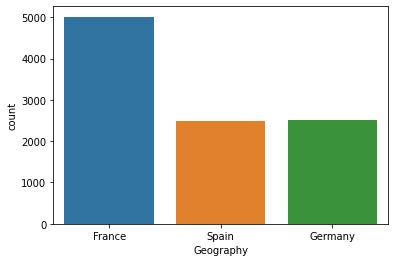

In [13]:
# Geography:
print('France  :', df['Geography'].value_counts()[0])
print('Germany :', df['Geography'].value_counts()[1])
print('Spain   :', df['Geography'].value_counts()[2])

# Visualization:
sns.countplot(df['Geography'])
plt.show()

Total Male   : 5457
Total Female : 4543


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


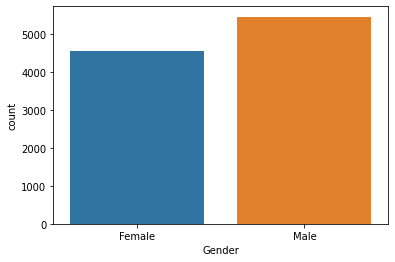

In [14]:
# Gender:
print('Total Male   :', df['Gender'].value_counts()[0])
print('Total Female :', df['Gender'].value_counts()[1])

# Visualization:
sns.countplot(df['Gender'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


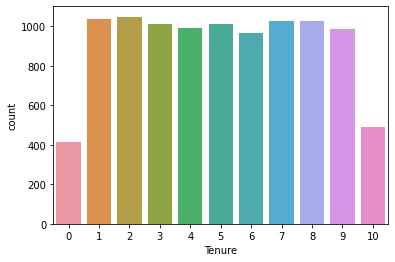

In [15]:
# Unique values present in Tenure feature:
df['Tenure'].unique()

# Visualization:
sns.countplot(df['Tenure'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


How many people have a CREDIT CARD?    : 7055
How many people haven"t a CREDIT CARD? : 2945


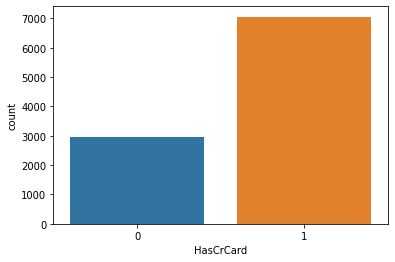

In [16]:
# HasCrCard feature:
print('How many people have a CREDIT CARD?    :', df['HasCrCard'].value_counts()[1])
print('How many people haven"t a CREDIT CARD? :', df['HasCrCard'].value_counts()[0])

# Visualization:
sns.countplot(df['HasCrCard'])
plt.show()

How many people was ACTIVE MEMBER?    : 5151
How many people wasn"t ACTIVE MEMBER? : 4849


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


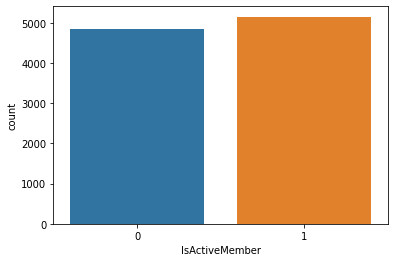

In [17]:
# IsActiveMember feature:
print('How many people was ACTIVE MEMBER?    :', df['IsActiveMember'].value_counts()[1])
print('How many people wasn"t ACTIVE MEMBER? :', df['IsActiveMember'].value_counts()[0])

# Visualization:
sns.countplot(df['IsActiveMember'])
plt.show()

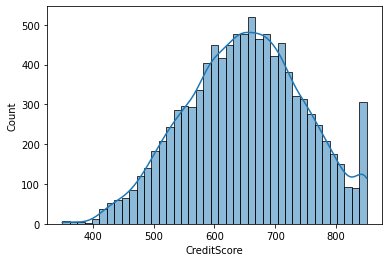

In [18]:
# Histrogram of CreditScore feature:
sns.histplot(df['CreditScore'], kde=True)
plt.show()

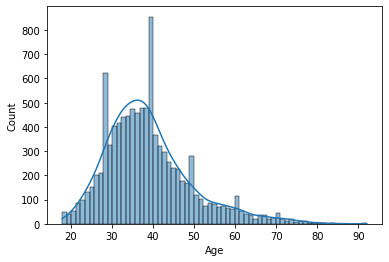

In [19]:
# Histrogram of Age feature:
sns.histplot(df['Age'], kde=True)
plt.show()

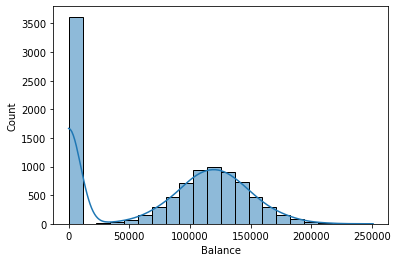

In [20]:
# Histrogram of Balance feature:
sns.histplot(df['Balance'], kde=True)
plt.show()

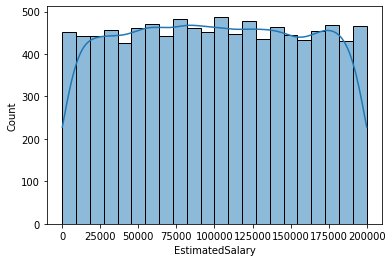

In [21]:
# Histrogram of EstimatedSalary feature:
sns.histplot(df['EstimatedSalary'], kde=True)
plt.show()

In [22]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


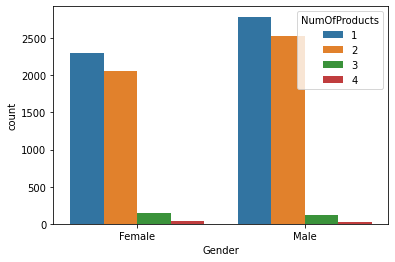

In [23]:
# Gender and NumOfProducts features:
sns.countplot(data=df, x='Gender', hue='NumOfProducts')
plt.show()

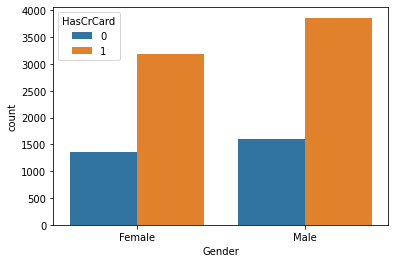

In [24]:
# Gender and HasCrCard features:
sns.countplot(data=df, x='Gender', hue='HasCrCard')
plt.show()

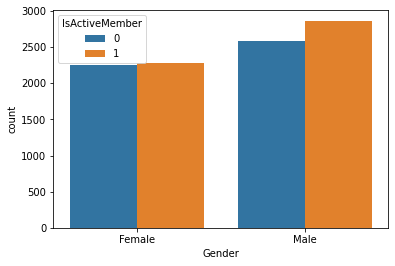

In [25]:
# Gender and IsActiveMember features:
sns.countplot(data=df, x='Gender', hue='IsActiveMember')
plt.show()

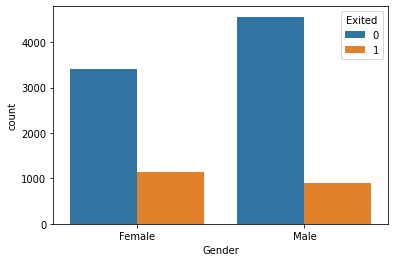

In [26]:
# Gender and Exited features:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.show()

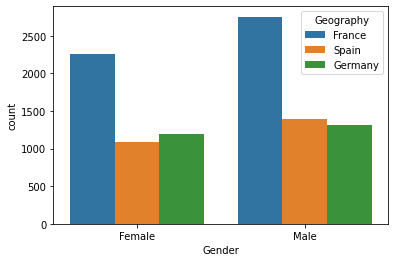

In [27]:
# Gender and Geography features:
sns.countplot(data=df, x='Gender', hue='Geography')
plt.show()

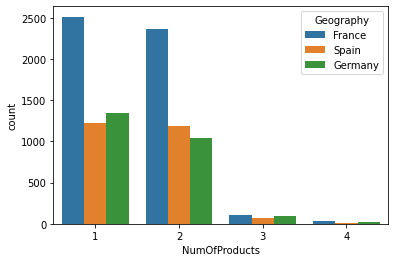

In [28]:
# NumOfProducts and Geography features:
sns.countplot(data=df, x='NumOfProducts', hue='Geography')
plt.show()

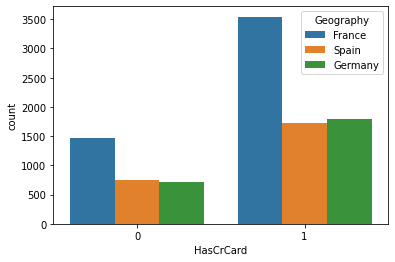

In [29]:
# HasCrCard and Geography features:
sns.countplot(data=df, x='HasCrCard', hue='Geography')
plt.show()

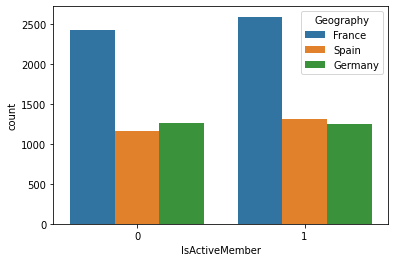

In [30]:
# IsActiveMember and Geography features:
sns.countplot(data=df, x='IsActiveMember', hue='Geography')
plt.show()

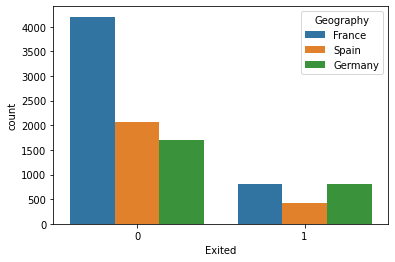

In [31]:
# Exited (target feature) and Geography features:
sns.countplot(data=df, x='Exited', hue='Geography')
plt.show()

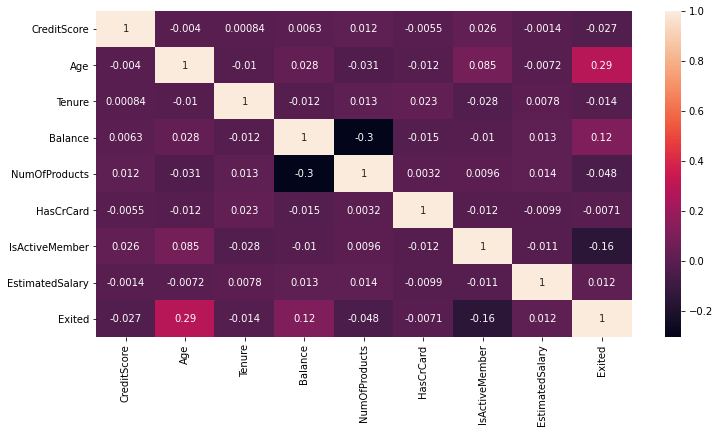

In [32]:
# Heatmap of dataset using correlation:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

- As we See, there is no Multicollinearity between features.

In [33]:
# top 5 records:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# Encoding on dataset:
df = pd.get_dummies(df, drop_first=True)

In [35]:
# top 5 records after encoding:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [36]:
# all columns of dataset:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [37]:
# Rearranging columns for good to see:
df = df[['Age', 'Gender_Male', 'Geography_Germany', 'Geography_Spain', 'Balance', 'CreditScore',  'Tenure',
         'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']]
df.head()

,Age,Gender_Male,Geography_Germany,Geography_Spain,Balance,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,0,0,0,0.00,619,2,1,1,1,101348.88,1
1,41,0,0,1,83807.86,608,1,1,0,1,112542.58,0
2,42,0,0,0,159660.80,502,8,3,1,0,113931.57,1
3,39,0,0,0,0.00,699,1,2,0,0,93826.63,0
4,43,0,0,1,125510.82,850,2,1,1,1,79084.10,0


In [38]:
# Splitting independent and dependent features:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [39]:
# top 5 records of independent features:
X.head()

,Age,Gender_Male,Geography_Germany,Geography_Spain,Balance,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,42,0,0,0,0.00,619,2,1,1,1,101348.88
1,41,0,0,1,83807.86,608,1,1,0,1,112542.58
2,42,0,0,0,159660.80,502,8,3,1,0,113931.57
3,39,0,0,0,0.00,699,1,2,0,0,93826.63
4,43,0,0,1,125510.82,850,2,1,1,1,79084.10


In [40]:
# top 5 records of dependent feature:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [41]:
# Over Sampling using SMOTETomek:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [42]:
# Shape before and after Over-Sampling:
print('Shape of X before Over-Sampling :', X.shape)
print('Shape of X after Over-Sampling  :', X_smote.shape)

Shape of X before Over-Sampling : (10000, 11)
Shape of X after Over-Sampling  : (13700, 11)


In [43]:
# train-test splitting:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

In [44]:
# importing performance metrics for evalution:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Model Buildings:

In [45]:
# Building Logistic Regression model:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression = LogisticRegression.fit(X_train, y_train)

# predicting test data:
y_pred = LogisticRegression.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.6885644768856448
Confusion Matrix :
[[1338  684]
 [ 596 1492]]
Classification Report :
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      2022
           1       0.69      0.71      0.70      2088

    accuracy                           0.69      4110
   macro avg       0.69      0.69      0.69      4110
weighted avg       0.69      0.69      0.69      4110



In [46]:
# Building Decision Tree Classifier model:
from sklearn.tree import DecisionTreeClassifier 
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)

# predicting test data:
y_pred = DecisionTree.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.8673965936739659
Confusion Matrix :
[[1748  274]
 [ 271 1817]]
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2022
           1       0.87      0.87      0.87      2088

    accuracy                           0.87      4110
   macro avg       0.87      0.87      0.87      4110
weighted avg       0.87      0.87      0.87      4110



In [47]:
# Building Random Forest Classifier model:
from sklearn.ensemble import RandomForestClassifier 
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train, y_train)

# predicting test data:
y_pred = RandomForest.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9090024330900244
Confusion Matrix :
[[1898  124]
 [ 250 1838]]
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2022
           1       0.94      0.88      0.91      2088

    accuracy                           0.91      4110
   macro avg       0.91      0.91      0.91      4110
weighted avg       0.91      0.91      0.91      4110



In [48]:
# Building AdaBoost Classifier model:
from sklearn.ensemble import AdaBoostClassifier 
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train, y_train)

# predicting test data:
y_pred = AdaBoost.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.8946472019464721
Confusion Matrix :
[[1866  156]
 [ 277 1811]]
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2022
           1       0.92      0.87      0.89      2088

    accuracy                           0.89      4110
   macro avg       0.90      0.90      0.89      4110
weighted avg       0.90      0.89      0.89      4110



In [49]:
# Building Gradient Boosting Classifier model:
from sklearn.ensemble import GradientBoostingClassifier 
GradientBoosting = GradientBoostingClassifier()
GradientBoosting = GradientBoosting.fit(X_train, y_train)

# predicting test data:
y_pred = GradientBoosting.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9041362530413626
Confusion Matrix :
[[1902  120]
 [ 274 1814]]
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2022
           1       0.94      0.87      0.90      2088

    accuracy                           0.90      4110
   macro avg       0.91      0.90      0.90      4110
weighted avg       0.91      0.90      0.90      4110



In [50]:
# Building Naive Bayes model:
from sklearn.naive_bayes import GaussianNB  
GaussianNB = GaussianNB()
GaussianNB = GaussianNB.fit(X_train, y_train)

# predicting test data:
y_pred = GaussianNB.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.7253041362530414
Confusion Matrix :
[[1405  617]
 [ 512 1576]]
Classification Report :
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      2022
           1       0.72      0.75      0.74      2088

    accuracy                           0.73      4110
   macro avg       0.73      0.72      0.72      4110
weighted avg       0.73      0.73      0.73      4110



In [51]:
# Building K-Neighbors Classifier model:
from sklearn.neighbors import KNeighborsClassifier  
KNeighbors = KNeighborsClassifier()
KNeighbors = KNeighbors.fit(X_train, y_train)

# predicting test data:
y_pred = KNeighbors.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.718978102189781
Confusion Matrix :
[[1303  719]
 [ 436 1652]]
Classification Report :
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2022
           1       0.70      0.79      0.74      2088

    accuracy                           0.72      4110
   macro avg       0.72      0.72      0.72      4110
weighted avg       0.72      0.72      0.72      4110



- Random Forest Classifier works well in above dataset and give us 85.76% accuracy. So we will do hyperparameter tunning with base model random forest classifier

### Hyperparameter tunning:

In [52]:
# importing RandomizedSearchCV:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [54]:
RandomForest = RandomForestClassifier()

RandomForest_randomCV = RandomizedSearchCV(estimator=RandomForest, param_distributions=random_grid, n_iter=10, cv=5, 
                                           verbose=2, random_state=0, n_jobs=-1)
# fit the randomized model
RandomForest_randomCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [55]:
# Best parameters after RandomizedSearchCV:
RandomForest_randomCV.best_params_

{'criterion': 'entropy',
 'max_depth': 890,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [56]:
# Building Random Forest Classifier model with best parameter values:
from sklearn.ensemble import RandomForestClassifier 
RandomForest = RandomForestClassifier(n_estimators=1000, criterion='entropy', min_samples_split=5, min_samples_leaf=2, 
                                      max_features='auto', max_depth=890)
RandomForest = RandomForest.fit(X_train, y_train)

# predicting test data:
y_pred = RandomForest.predict(X_test)

# Scores:
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))
print('Classification Report :')
print(classification_report(y_test, y_pred))

Accuracy Score : 0.9094890510948905
Confusion Matrix :
[[1906  116]
 [ 256 1832]]
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2022
           1       0.94      0.88      0.91      2088

    accuracy                           0.91      4110
   macro avg       0.91      0.91      0.91      4110
weighted avg       0.91      0.91      0.91      4110



- After applying RandomizedSearchCV not getting that much accuracy as we expected.

In [59]:
# Creating a pickle file for the classifier
import pickle
filename = '/content/drive/MyDrive/Colab Notebooks/ChurnModelling2.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))